# **Soil Lab Research**
------

# **Soil Water Retention Curve**

 Model proposed by van Genuchten in 1980: <br /> 
 <br />
$ \frac{\theta - \theta_r}{\theta_s - \theta_r} = [1 + (-\alpha \psi_m)^n]^{-m} $
    
 van Genuchten, M.T.1980. A closed-form equation for predicting the
 hydraulic conductivity of unsaturated flow. Soil Sci. Soc. Am. J. 44,
 892-898.

<img src = "Sketch_1.jpg" width="350" height="350" align="left">

Site-specific soil properties were analyzed by utilizing the HYPROP instrument which uses innovative precision mini-tensiometers for automated measurements of soil moisture release curves and the WP4C instrument (Meter Group).

In [166]:
# Import modules
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [167]:
#get working directory 
print(glob.os.getcwd())

#read xlsx file
df = pd.read_excel(r'..\Soil_Lab_research\HYPROP\moisture_retention_models\model_fit.xlsx')

C:\Users\Dyer\Dropbox\Wes Dyer\USGA_zoysia_research\python_code


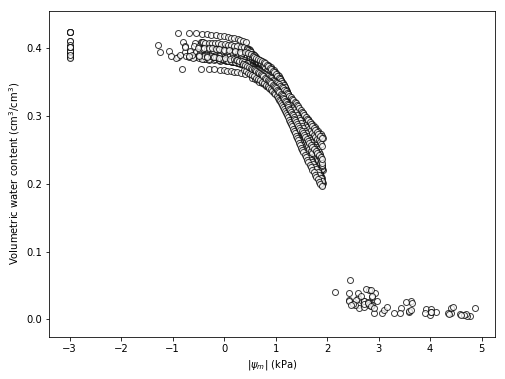

In [168]:
# Plot observations from each plot , total 16 samples
plt.figure(figsize=(8,6))
plt.scatter(np.log10(df['matric']),df['theta']/100,marker='o', facecolor='w', alpha=0.75, edgecolor='k')
plt.xlabel('$|\psi_m|$ (kPa)')
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)")
plt.show()

In [169]:
# van Genuchten model 
model = lambda x, alpha, n, m, theta_r, theta_s: theta_r + (theta_s-theta_r)*(1+(alpha*x)**n)**-m

In [170]:
xdata = df["matric"]
ydata = df["theta"]/100
#p0 = [0.002, 1.5, 1, 0.05, 0.5]
bounds=([0, 1, 0, 0, 0.35],[1, 5, 2, 0.25, 0.55])
par_opt, par_cov = curve_fit(model, xdata, ydata, bounds=bounds)

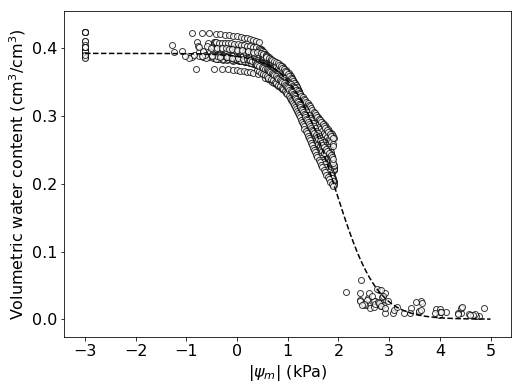

In [171]:
# Plot results; moisture release curve 
plt.figure(figsize=(8,6))
plt.scatter(np.log10(xdata), ydata, marker='o', facecolor='w', alpha=0.75, edgecolor='k')
plt.plot(np.log10(matric), model(matric, * par_opt), '--k')
plt.xlabel('$|\psi_m|$ (kPa)', size=16)
plt.ylabel('Volumetric water content (cm$^3$/cm$^3$)', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# **Particle Size Analysis** 

The hydrometer method was used to determine particle size analysis for each plot

Day,P.R. 1965. Particle fractionation and particle-size analysis. In C. A. Black, ed. Methods of soil analysis, Part 1. Agronomy No. 9. Am. Soc. Agron., Madison, WI.

<img src = "Sketch_2.jpg" width="350" height="350">

<img src = "Sketch_4.jpg" width="350" height="350">

In [140]:
#get working directory 
print(glob.os.getcwd())

#read xlsx file
df_ = pd.read_excel(r'..\Soil_Lab_research\Hydrometer\USGA_A_P_samples.xlsx')

C:\Users\Dyer\Dropbox\Wes Dyer\USGA_zoysia_research\python_code


In [154]:
df_3 = df_2.loc[2:,['sand_pct','silt_pct','clay_pct']]
print(df_3)

     sand_pct   silt_pct   clay_pct
2    8.570020  67.633136  23.796844
3   10.548632  64.253799  25.197568
4   11.683877  66.867921  21.448201
5   11.114293  66.191484  22.694223
6   14.852941  63.702614  21.444444
7   13.916507  63.296686  22.786807
8   15.065855  62.285040  22.649105
9   15.085265  63.369205  21.545530
10   9.459640  65.390260  25.150100
11   4.753407  66.421966  28.824627
12   6.830592  67.988487  25.180921
13   6.384546  64.714039  28.901415
14  12.405194  64.908381  22.686424
15   9.198228  64.500569  26.301203
16  13.238973  65.385122  21.375905
17  13.926995  64.711821  21.361184


In [165]:
#import statistics module
import statistics as stats

#sand 
sand_mean = ("Mean of sand:", stats.mean(df_3['sand_pct']))
print(sand_mean)
sand_stdev = ("Standard deviation of sand:", stats.stdev(df_3['sand_pct']))
print(sand_stdev)

#silt
silt_mean = ("Mean of silt:", stats.mean(df_3['silt_pct']))
print(silt_mean)
silt_stdev = ("Standard deviation of silt:", stats.stdev(df_3['silt_pct']))
print(silt_stdev)

#clay 
clay_mean = ("Mean of clay:", stats.mean(df_3['clay_pct']))
print(clay_mean)
clay_stdev = ("Standard deviation of clay:", stats.stdev(df_3['clay_pct']))
print(clay_stdev)

('Mean of sand:', 11.064685334224173)
('Standard deviation of sand:', 3.2860751023716634)
('Mean of silt:', 65.10128322326426)
('Standard deviation of silt:', 1.602626005126253)
('Mean of clay:', 23.83403144251157)
('Standard deviation of clay:', 2.52971576318382)


<img src = "Sketch_3.png" width="500" height="500">

Soil texture classification: Silt loam ;  *note two samples fell just inside the silty clay loam classisfication